<a href="https://colab.research.google.com/github/MuHyeonSon/Medical_image_processing/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공지능을이용한의료영상처리및실습 HW4

바이오메디컬공학부 손무현

네 번째 과제의 목표는 실습자료02에 포함되어 있는 100명의 MRI t1ce.nii.gz & seg.nii.gz 로부터 pyradiomics를 활용하여 radiomics feature를 추출해보는 것입니다. 아래의 Lab06 실습코드를 참고하여 100명으로부터 한 번의 실행으로 radiomics feature를 추출해낼 수 있도록 합니다.

seg.nii.gz로부터 4번으로 할당되어 있는 enhanced region을 mask(or label or roi)로 사용하며, 최소 80개 이상의 서로 다른 feature를 추출하도록 합니다. 만약, 100명의 데이터로부터 90개의 feature를 추출한다면 90 x 100 크기의 matrix를 최종 결과로 얻게 될 것입니다. radiomics feature의 추출을 위한 setting은 자유롭게 설정하여도 괜찮으며, 아래의 내용들은 반드시 수행해 주어야 합니다.

1. 한 번의 실행으로 100명에 대한 feature를 추출할 수 있도록 python문법을 이용한 loop를 만들어야 합니다. 

In [ ]:
!python -m pip install pyradiomics

     |████████████████████████████████| 188 kB 5.1 MB/s 
     |████████████████████████████████| 48.4 MB 5.5 kB/s 
     |████████████████████████████████| 109 kB 67.0 MB/s 
     |████████████████████████████████| 546 kB 75.1 MB/s 


In [ ]:
from __future__ import print_function
import six
import os  # needed navigate the system to get the input data

import radiomics
from radiomics import featureextractor  # This module is used for interaction with pyradiomics
import SimpleITK as sitk

import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path0 = '/content/drive/MyDrive/Digital_image_processing/project/brats18_train' # replace your data path
dpiv = 80
path_list = glob.glob(os.path.join(path0,'Brats18*'))
len(path_list)

100

In [ ]:
for i in path_list:
  print(i)

/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_11_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_17_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_7_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_21_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_19_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_2_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_26_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_4_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_13_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_23_1
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_CBICA_ALX_1
/content/drive/MyDrive/Digital_im

In [ ]:
# First define the settings
settings = {}
settings['binWidth'] = 10
settings['sigma'] = 1
settings['label'] = 4

# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)  # ** 'unpacks' the dictionary in the function call


print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)  # Still the default parameters
print('Enabled features:\n\t', extractor.enabledFeatures)  # Still the default parameters

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 4, 'additionalInfo': True, 'binWidth': 10, 'sigma': 1}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [ ]:
train_ind = np.arange(0,100)
data_dicts = [
    {
        "image": os.path.join(path_list[idx],
                                    "t1ce.nii.gz"),
        "label": os.path.join(path_list[idx],
                                    "seg.nii.gz"),
    }
    for idx in train_ind
]
train_files =  data_dicts
train_files[3]

{'image': '/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_21_1/t1ce.nii.gz',
 'label': '/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_21_1/seg.nii.gz'}

In [ ]:
len(train_files)

100

In [ ]:
type(train_files)

list

100명에 대해 feature 뽑으면

In [ ]:
features = {}

for i in range(len(train_files)):
  
  globals()['imagePath%s' % i] = train_files[i]['image']
  globals()['maskPath%s' % i] = train_files[i]['label']

  imagePath = globals()['imagePath%s' % i]
  maskPath = globals()['maskPath%s' % i]

#  print(imagePath1)
#  print(maskPath1)
  
  imagePath = sitk.ReadImage(imagePath)
  maskPath = sitk.ReadImage(maskPath)
 

  globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
  result = globals()['result_%s' % i]

  feature = np.array([])
  feature_name = np.array([])
  for key, value in six.iteritems(result):
    if key.startswith("original_firstorder") or key.startswith("original_glrlm") or key.startswith("original_ngtdm") or key.startswith("original_glcm") or key.startswith("original_glszm")or key.startswith("original_shape"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

  if not 'feature_name' in  features:
    features['feature_name'] = feature_name
    features[(path_list[i].split('/')[-1])] = feature
  else :  
    features[(path_list[i].split('/')[-1])] = feature

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [ ]:
import pandas as pd

In [ ]:
T = pd.DataFrame(features)
T

,feature_name,Brats18_2013_11_1,Brats18_2013_17_1,Brats18_2013_7_1,Brats18_2013_21_1,Brats18_2013_19_1,Brats18_2013_2_1,Brats18_2013_26_1,Brats18_2013_4_1,Brats18_2013_13_1,Brats18_2013_23_1,Brats18_CBICA_ALX_1,Brats18_CBICA_ABO_1,Brats18_CBICA_AAL_1,Brats18_CBICA_ABB_1,Brats18_CBICA_ANZ_1,Brats18_CBICA_ANI_1,Brats18_CBICA_AMH_1,Brats18_CBICA_AAB_1,Brats18_CBICA_ABM_1,Brats18_CBICA_ALN_1,Brats18_CBICA_AOH_1,Brats18_CBICA_AQO_1,Brats18_CBICA_APZ_1,Brats18_CBICA_AQJ_1,Brats18_CBICA_AQQ_1,Brats18_CBICA_AQD_1,Brats18_CBICA_AQV_1,Brats18_CBICA_AQT_1,Brats18_CBICA_AOP_1,Brats18_CBICA_APR_1,Brats18_CBICA_ATD_1,Brats18_CBICA_AQZ_1,Brats18_CBICA_ASK_1,Brats18_CBICA_ASV_1,Brats18_CBICA_ASG_1,Brats18_CBICA_ARW_1,Brats18_CBICA_ATP_1,Brats18_CBICA_ASO_1,Brats18_CBICA_ASA_1,...,Brats18_TCIA02_226_1,Brats18_TCIA02_168_1,Brats18_TCIA01_378_1,Brats18_TCIA01_429_1,Brats18_TCIA01_412_1,Brats18_TCIA02_208_1,Brats18_TCIA02_179_1,Brats18_TCIA02_117_1,Brats18_TCIA01_401_1,Brats18_TCIA02_135_1,Brats18_TCIA02_455_1,Brats18_TCIA02_300_1,Brats18_TCIA02_283_1,Brats18_TCIA02_322_1,Brats18_TCIA02_605_1,Brats18_TCIA03_121_1,Brats18_TCIA02_473_1,Brats18_TCIA02_374_1,Brats18_TCIA02_368_1,Brats18_TCIA02_394_1,Brats18_TCIA03_375_1,Brats18_TCIA03_474_1,Brats18_TCIA03_257_1,Brats18_TCIA04_192_1,Brats18_TCIA04_111_1,Brats18_TCIA04_343_1,Brats18_TCIA05_277_1,Brats18_TCIA03_296_1,Brats18_TCIA03_138_1,Brats18_TCIA04_437_1,Brats18_TCIA08_278_1,Brats18_TCIA08_162_1,Brats18_TCIA08_234_1,Brats18_TCIA08_319_1,Brats18_TCIA08_105_1,Brats18_TCIA06_165_1,Brats18_TCIA08_205_1,Brats18_TCIA06_332_1,Brats18_TCIA05_444_1,Brats18_TCIA06_211_1
0,Elongation,0.624455,0.860792,0.793646,0.630887,0.968441,0.437173,0.954080,0.250197,0.730737,0.899412,0.657834,0.641787,0.939662,0.409277,0.820316,0.600865,0.798983,0.932857,0.874491,0.608009,0.385850,0.906406,0.690851,0.638908,0.715845,0.817875,0.748573,0.967853,0.840986,0.830764,0.736869,0.726864,0.745958,0.903682,0.644497,0.700942,0.867934,0.745797,0.602204,...,0.882753,0.874935,0.770750,0.954938,0.781187,0.907672,0.715444,0.818966,0.813549,0.661310,0.817172,0.801317,0.728254,0.664722,0.687576,0.957488,0.783315,0.887623,0.774499,6.950790e-01,0.777194,0.798160,0.583006,0.770123,0.763457,0.875971,0.692083,0.564764,0.756522,0.698327,0.871216,0.863750,0.924958,0.678009,0.927809,0.712645,0.951025,0.288215,0.707256,0.750018
1,Flatness,0.508177,0.728738,0.592554,0.554793,0.561992,0.271334,0.862770,0.167805,0.558908,0.787514,0.600560,0.505472,0.841923,0.368889,0.619319,0.461851,0.564606,0.640265,0.683998,0.352174,0.300196,0.839113,0.594092,0.549561,0.366741,0.695258,0.702771,0.565284,0.730820,0.650026,0.612446,0.591128,0.620534,0.853494,0.603424,0.544719,0.830210,0.630296,0.481350,...,0.663485,0.734085,0.629948,0.725143,0.649246,0.765323,0.554232,0.689807,0.728903,0.491477,0.668923,0.685231,0.663626,0.554633,0.625893,0.874134,0.612265,0.850547,0.636703,6.610077e-01,0.638055,0.738101,0.494183,0.706205,0.675281,0.735491,0.462590,0.434643,0.598986,0.579901,0.586941,0.687677,0.662178,0.569713,0.722365,0.531016,0.579201,0.234897,0.599298,0.587406
2,LeastAxisLength,37.818259,40.329482,32.649269,32.585550,33.642407,22.534087,17.584480,29.685910,15.227797,54.446649,26.218935,37.805009,16.899232,24.591057,24.380716,20.728084,20.360048,32.022522,21.054284,19.850857,15.464208,30.767011,30.026542,36.100502,28.266694,19.630005,28.847845,24.380601,28.362083,34.733652,21.274450,31.158628,18.369674,30.376280,43.996809,22.741835,12.911519,25.807350,35.772041,...,20.190277,38.510130,38.162576,34.024008,46.497446,16.448487,21.993314,31.337697,41.147921,27.312867,29.372900,46.099707,21.026524,18.899330,26.717494,34.368656,15.918444,45.930674,32.638228,3.415163e+01,31.266692,49.568844,28.780394,24.652105,24.765419,17.889203,31.247291,39.459452,40.292158,12.444118,28.941122,41.108674,19.928277,26.606374,44.458325,28.549378,37.335287,24.589370,30.221595,38.148879
3,MajorAxisLength,74.419471,55.341506,55.099273,58.734577,59.862789,83.049291,20.381414,176.906707,27.245601

2. 최종결과는 Lab06의 코드를 참고하여 최종결과를 csv로 저장하여 ipynb파일과 함께 첨부하여 제출합니다.

In [ ]:
T.to_csv(os.path.join(path0,'HW4_201804594.csv'))

3. ipynb파일의 마지막 부분에 original_firstorder_Kurtosis와 original_shape_VoxelVolume에 대한 100명의 평균과 표준편차를 계산하여 출력하는 과정을 포함하도록 합니다.

In [ ]:
features = {}

for i in range(len(train_files)):
  
  globals()['imagePath%s' % i] = train_files[i]['image']
  globals()['maskPath%s' % i] = train_files[i]['label']

  imagePath = globals()['imagePath%s' % i]
  maskPath = globals()['maskPath%s' % i]

#  print(imagePath1)
#  print(maskPath1)
  
  imagePath = sitk.ReadImage(imagePath)
  maskPath = sitk.ReadImage(maskPath)
 

  globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
  result = globals()['result_%s' % i]

  feature = np.array([])
  feature_name = np.array([])
  for key, value in six.iteritems(result):
    if key.startswith("original_firstorder_Kurtosis") or key.startswith("original_shape_VoxelVolume"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

  if not 'feature_name' in  features:
    features['feature_name'] = feature_name
    features[(path_list[i].split('/')[-1])] = feature
  else :  
    features[(path_list[i].split('/')[-1])] = feature

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [ ]:
T = pd.DataFrame(features)
T

,feature_name,Brats18_2013_11_1,Brats18_2013_17_1,Brats18_2013_7_1,Brats18_2013_21_1,Brats18_2013_19_1,Brats18_2013_2_1,Brats18_2013_26_1,Brats18_2013_4_1,Brats18_2013_13_1,Brats18_2013_23_1,Brats18_CBICA_ALX_1,Brats18_CBICA_ABO_1,Brats18_CBICA_AAL_1,Brats18_CBICA_ABB_1,Brats18_CBICA_ANZ_1,Brats18_CBICA_ANI_1,Brats18_CBICA_AMH_1,Brats18_CBICA_AAB_1,Brats18_CBICA_ABM_1,Brats18_CBICA_ALN_1,Brats18_CBICA_AOH_1,Brats18_CBICA_AQO_1,Brats18_CBICA_APZ_1,Brats18_CBICA_AQJ_1,Brats18_CBICA_AQQ_1,Brats18_CBICA_AQD_1,Brats18_CBICA_AQV_1,Brats18_CBICA_AQT_1,Brats18_CBICA_AOP_1,Brats18_CBICA_APR_1,Brats18_CBICA_ATD_1,Brats18_CBICA_AQZ_1,Brats18_CBICA_ASK_1,Brats18_CBICA_ASV_1,Brats18_CBICA_ASG_1,Brats18_CBICA_ARW_1,Brats18_CBICA_ATP_1,Brats18_CBICA_ASO_1,Brats18_CBICA_ASA_1,...,Brats18_TCIA02_226_1,Brats18_TCIA02_168_1,Brats18_TCIA01_378_1,Brats18_TCIA01_429_1,Brats18_TCIA01_412_1,Brats18_TCIA02_208_1,Brats18_TCIA02_179_1,Brats18_TCIA02_117_1,Brats18_TCIA01_401_1,Brats18_TCIA02_135_1,Brats18_TCIA02_455_1,Brats18_TCIA02_300_1,Brats18_TCIA02_283_1,Brats18_TCIA02_322_1,Brats18_TCIA02_605_1,Brats18_TCIA03_121_1,Brats18_TCIA02_473_1,Brats18_TCIA02_374_1,Brats18_TCIA02_368_1,Brats18_TCIA02_394_1,Brats18_TCIA03_375_1,Brats18_TCIA03_474_1,Brats18_TCIA03_257_1,Brats18_TCIA04_192_1,Brats18_TCIA04_111_1,Brats18_TCIA04_343_1,Brats18_TCIA05_277_1,Brats18_TCIA03_296_1,Brats18_TCIA03_138_1,Brats18_TCIA04_437_1,Brats18_TCIA08_278_1,Brats18_TCIA08_162_1,Brats18_TCIA08_234_1,Brats18_TCIA08_319_1,Brats18_TCIA08_105_1,Brats18_TCIA06_165_1,Brats18_TCIA08_205_1,Brats18_TCIA06_332_1,Brats18_TCIA05_444_1,Brats18_TCIA06_211_1
0,VoxelVolume,19677.00000,60991.00000,26264.000000,17816.000000,18354.000000,21677.000000,4678.000000,19840.000000,4467.000000,72360.000000,4039.000000,50901.000000,2998.000000,10786.000000,9813.000000,7222.000000,9002.000000,27742.000000,6159.000000,5774.000000,3003.000000,16009.000000,16760.000000,22108.000000,24262.000000,5701.000000,12826.000000,15211.000000,10937.000000,17433.000000,8613.000000,15158.000000,6047.000000,9075.00000,32001.000000,2624.000000,1172.000000,13105.000000,40108.000000,...,9769.000000,29915.000000,43375.000000,34538.000000,74539.000000,4439.000000,9371.000000,18881.000000,50410.000000,33532.00000,22125.000000,38724.000000,6929.000000,8858.000000,15114.000000,29059.000000,5096.000000,54064.000000,36248.000000,21184.000000,25944.000000,111250.000000,18666.000000,15090.000000,10910.000000,4951.000000,47182.000000,68592.000000,61113.000000,2642.000000,26417.000000,36345.000000,10930.000000,14699.000000,52126.000000,5899.000000,77776.000000,14523.000000,11994.000000,69134.000000
1,Kurtosis,9.55925,2.73503,3.587632,2.415432,3.341273,3.574418,3.141201,8.391249,3.103476,4.410445,3.441443,4.740985,2.478068,5.005192,6.890819,2.586841,4.729619,2.728956,2.730907,2.593185,7.162982,2.610408,2.731421,3.337908,4.554331,4.083238,3.122091,3.452761,3.235367,2.145559,3.180356,2.715483,2.674477,3.33109,4.831236,5.651824,3.120837,2.297887,2.833231,...,2.341649,3.389644,2.628403,2.316902,4.253601,2.013036,2.506311,3.938502,2.696705,3.13619,2.292837,2.482149,3.983698,2.720434,2.282416,2.794967,3.454225,3.969831,1.857588,2.744047,6.248682,3.610576,3.860819,2.379664,3.938268,3.276359,4.461409,3.659774,3.060573,2.324643,5.493363,3.606933,3.292965,5.541253,4.741022,4.226246,3.616059,2.985327,3.511398,2.023704


In [ ]:
# 100명의 평균
T.mean(axis=1,skipna=False)

# 0 : VoxelVolume
# 1 : Kurtosis

0    21769.770000
1        3.618365
dtype: float64

In [ ]:
# 100명의 표준편차
T.std(axis=1)

# 0 : VoxelVolume
# 1 : Kurtosis

0    20793.741250
1        1.460723
dtype: float64

4. 위의 kurtosis 및 voxelvolume에 대해서 "2013", "CBICA", "TCIA" 그룹 별로 나누어 boxplot을 출력하는 과정을 포함하도록 합니다. 

 참고: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
p2 = glob.glob(os.path.join(path0,'Brats18_2*'))
pC = glob.glob(os.path.join(path0,'Brats18_C*'))
pT = glob.glob(os.path.join(path0,'Brats18_T*'))

print(type(p2))
print(len(p2)) #(0~9)
print(len(pC)) #(10~53)
print(len(pT)) #(54~100)

<class 'list'>
10
44
46


In [ ]:
features_p2_k = {}
features_pC_k = {}
features_pT_k = {}

n1 = 0
n2 = 0

for i in range(len(train_files)):

  if i <10:

    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_firstorder_Kurtosis"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        # if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        features_p2_k[i] = feature
  elif 10<=i and i <=53:
    
    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_firstorder_Kurtosis"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        # if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        features_pC_k[n1] = feature
        n1 += 1
  else:
    
    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_firstorder_Kurtosis"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        #if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        
        features_pT_k[n2] = feature
        n2 += 1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [ ]:
T_2_k = pd.DataFrame(features_p2_k)

T_2_k

,0,1,2,3,4,5,6,7,8,9
0,9.55925,2.73503,3.587632,2.415432,3.341273,3.574418,3.141201,8.391249,3.103476,4.410445


In [ ]:
T_2_k = pd.DataFrame(features_p2_k)
T_2_k=T_2_k.transpose()
#T_k = pd.DataFrame(T_k, columns=['ii'])
T_C_k = pd.DataFrame(features_pC_k)
T_C_k=T_C_k.transpose()
T_T_k = pd.DataFrame(features_pT_k)
T_T_k=T_T_k.transpose()

In [ ]:
T_k = pd.concat([T_2_k,T_C_k,T_T_k],axis=1)
#"2013", "CBICA", "TCIA"
T_k.columns = ['2013','CBICA','TCIA']
#T_k = pd.DataFrame(T_k, columns=['ii'])

In [ ]:
T_k

,2013,CBICA,TCIA
0,9.559250,3.441443,3.164433
1,2.735030,4.740985,4.492794
2,3.587632,2.478068,2.728174
3,2.415432,5.005192,3.867774
4,3.341273,6.890819,9.812302
5,3.574418,2.586841,3.382246
6,3.141201,4.729619,2.341649
7,8.391249,2.728956,3.389644
8,3.103476,2.730907,2.628403
9,4.410445,2.593185,2.316902


In [ ]:
T_k = T_k.to_numpy()

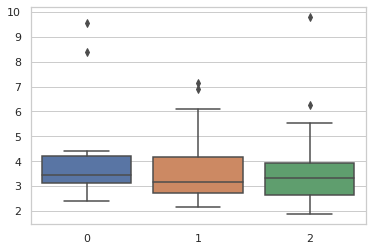

In [ ]:
import seaborn as sns

# Kurtosis
ax = sns.boxplot(data=T_k)

In [ ]:
features_p2_v = {}
features_pC_v = {}
features_pT_v = {}

n1 = 0
n2 = 0

for i in range(len(train_files)):

  if i <10:

    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_shape_VoxelVolume"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        # if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        features_p2_v[i] = feature
  elif 10<=i and i <=53:
    
    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_shape_VoxelVolume"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        # if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        features_pC_v[n1] = feature
        n1 += 1
  else:
    
    globals()['imagePath%s' % i] = train_files[i]['image']
    globals()['maskPath%s' % i] = train_files[i]['label']

    imagePath = globals()['imagePath%s' % i]
    maskPath = globals()['maskPath%s' % i]

    #  print(imagePath1)
    #  print(maskPath1)
  
    imagePath = sitk.ReadImage(imagePath)
    maskPath = sitk.ReadImage(maskPath)
 

    globals()['result_%s' % i] = extractor.execute(imagePath,maskPath)
    result = globals()['result_%s' % i]

    feature = np.array([])
    feature_name = np.array([])
    for key, value in six.iteritems(result):
      if key.startswith("original_shape_VoxelVolume"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature = np.append ( feature, result[key])

        #if not 'feature_name' in  features:
        #   features['feature_name'] = feature_name
        #   features[(path_list[i].split('/')[-1])] = feature
        # else :  
        
        features_pT_v[n2] = feature
        n2 += 1


T_2_v = pd.DataFrame(features_p2_v)
T_2_v=T_2_v.transpose()
T_C_v = pd.DataFrame(features_pC_v)
T_C_v=T_C_v.transpose()
T_T_v = pd.DataFrame(features_pT_v)
T_T_v=T_T_v.transpose()

T_v = pd.concat([T_2_v,T_C_v,T_T_v],axis=1)
#"2013", "CBICA", "TCIA"
T_v.columns = ['2013','CBICA','TCIA']
#T_k = pd.DataFrame(T_k, columns=['ii'])

T_k = T_k.to_numpy()

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

AttributeError: ignored

In [ ]:
T_v = T_v.to_numpy()

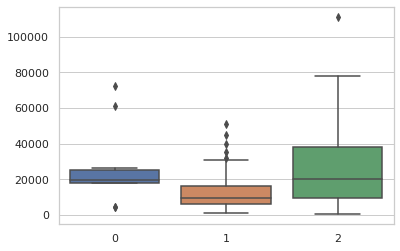

In [ ]:
#voxelvolume
ax = sns.boxplot(data=T_v)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
T_2_k

,0,1,2,3,4,5,6,7,8,9
0,9.55925,2.73503,3.587632,2.415432,3.341273,3.574418,3.141201,8.391249,3.103476,4.410445


In [ ]:
#del features['feature_name'] 

In [ ]:
T = pd.DataFrame(features)
T

,Brats18_2013_11_1,Brats18_2013_17_1,Brats18_2013_7_1,Brats18_2013_21_1,Brats18_2013_19_1,Brats18_2013_2_1,Brats18_2013_26_1,Brats18_2013_4_1,Brats18_2013_13_1,Brats18_2013_23_1,Brats18_CBICA_ALX_1,Brats18_CBICA_ABO_1,Brats18_CBICA_AAL_1,Brats18_CBICA_ABB_1,Brats18_CBICA_ANZ_1,Brats18_CBICA_ANI_1,Brats18_CBICA_AMH_1,Brats18_CBICA_AAB_1,Brats18_CBICA_ABM_1,Brats18_CBICA_ALN_1,Brats18_CBICA_AOH_1,Brats18_CBICA_AQO_1,Brats18_CBICA_APZ_1,Brats18_CBICA_AQJ_1,Brats18_CBICA_AQQ_1,Brats18_CBICA_AQD_1,Brats18_CBICA_AQV_1,Brats18_CBICA_AQT_1,Brats18_CBICA_AOP_1,Brats18_CBICA_APR_1,Brats18_CBICA_ATD_1,Brats18_CBICA_AQZ_1,Brats18_CBICA_ASK_1,Brats18_CBICA_ASV_1,Brats18_CBICA_ASG_1,Brats18_CBICA_ARW_1,Brats18_CBICA_ATP_1,Brats18_CBICA_ASO_1,Brats18_CBICA_ASA_1,Brats18_CBICA_ASY_1,...,Brats18_TCIA02_226_1,Brats18_TCIA02_168_1,Brats18_TCIA01_378_1,Brats18_TCIA01_429_1,Brats18_TCIA01_412_1,Brats18_TCIA02_208_1,Brats18_TCIA02_179_1,Brats18_TCIA02_117_1,Brats18_TCIA01_401_1,Brats18_TCIA02_135_1,Brats18_TCIA02_455_1,Brats18_TCIA02_300_1,Brats18_TCIA02_283_1,Brats18_TCIA02_322_1,Brats18_TCIA02_605_1,Brats18_TCIA03_121_1,Brats18_TCIA02_473_1,Brats18_TCIA02_374_1,Brats18_TCIA02_368_1,Brats18_TCIA02_394_1,Brats18_TCIA03_375_1,Brats18_TCIA03_474_1,Brats18_TCIA03_257_1,Brats18_TCIA04_192_1,Brats18_TCIA04_111_1,Brats18_TCIA04_343_1,Brats18_TCIA05_277_1,Brats18_TCIA03_296_1,Brats18_TCIA03_138_1,Brats18_TCIA04_437_1,Brats18_TCIA08_278_1,Brats18_TCIA08_162_1,Brats18_TCIA08_234_1,Brats18_TCIA08_319_1,Brats18_TCIA08_105_1,Brats18_TCIA06_165_1,Brats18_TCIA08_205_1,Brats18_TCIA06_332_1,Brats18_TCIA05_444_1,Brats18_TCIA06_211_1
0,0.624455,0.860792,0.793646,0.630887,0.968441,0.437173,0.954080,0.250197,0.730737,0.899412,0.657834,0.641787,0.939662,0.409277,0.820316,0.600865,0.798983,0.932857,0.874491,0.608009,0.385850,0.906406,0.690851,0.638908,0.715845,0.817875,0.748573,0.967853,0.840986,0.830764,0.736869,0.726864,0.745958,0.903682,0.644497,0.700942,0.867934,0.745797,0.602204,0.694663,...,0.882753,0.874935,0.770750,0.954938,0.781187,0.907672,0.715444,0.818966,0.813549,0.661310,0.817172,0.801317,0.728254,0.664722,0.687576,0.957488,0.783315,0.887623,0.774499,6.950790e-01,0.777194,0.798160,0.583006,0.770123,0.763457,0.875971,0.692083,0.564764,0.756522,0.698327,0.871216,0.863750,0.924958,0.678009,0.927809,0.712645,0.951025,0.288215,0.707256,0.750018
1,0.508177,0.728738,0.592554,0.554793,0.561992,0.271334,0.862770,0.167805,0.558908,0.787514,0.600560,0.505472,0.841923,0.368889,0.619319,0.461851,0.564606,0.640265,0.683998,0.352174,0.300196,0.839113,0.594092,0.549561,0.366741,0.695258,0.702771,0.565284,0.730820,0.650026,0.612446,0.591128,0.620534,0.853494,0.603424,0.544719,0.830210,0.630296,0.481350,0.498150,...,0.663485,0.734085,0.629948,0.725143,0.649246,0.765323,0.554232,0.689807,0.728903,0.491477,0.668923,0.685231,0.663626,0.554633,0.625893,0.874134,0.612265,0.850547,0.636703,6.610077e-01,0.638055,0.738101,0.494183,0.706205,0.675281,0.735491,0.462590,0.434643,0.598986,0.579901,0.586941,0.687677,0.662178,0.569713,0.722365,0.531016,0.579201,0.234897,0.599298,0.587406
2,37.818259,40.329482,32.649269,32.585550,33.642407,22.534087,17.584480,29.685910,15.227797,54.446649,26.218935,37.805009,16.899232,24.591057,24.380716,20.728084,20.360048,32.022522,21.054284,19.850857,15.464208,30.767011,30.026542,36.100502,28.266694,19.630005,28.847845,24.380601,28.362083,34.733652,21.274450,31.158628,18.369674,30.376280,43.996809,22.741835,12.911519,25.807350,35.772041,24.411657,...,20.190277,38.510130,38.162576,34.024008,46.497446,16.448487,21.993314,31.337697,41.147921,27.312867,29.372900,46.099707,21.026524,18.899330,26.717494,34.368656,15.918444,45.930674,32.638228,3.415163e+01,31.266692,49.568844,28.780394,24.652105,24.765419,17.889203,31.247291,39.459452,40.292158,12.444118,28.941122,41.108674,19.928277,26.606374,44.458325,28.549378,37.335287,24.589370,30.221595,38.148879
3,74.419471,55.341506,55.099273,58.734577,59.862789,83.049291,20.381414,176.906707,27.245601,69.137411,43.657

In [ ]:
Ta = T.to_numpy()
print(Ta)

[[1.96770000e+04 6.09910000e+04 2.62640000e+04 1.78160000e+04
  1.83540000e+04 2.16770000e+04 4.67800000e+03 1.98400000e+04
  4.46700000e+03 7.23600000e+04 4.03900000e+03 5.09010000e+04
  2.99800000e+03 1.07860000e+04 9.81300000e+03 7.22200000e+03
  9.00200000e+03 2.77420000e+04 6.15900000e+03 5.77400000e+03
  3.00300000e+03 1.60090000e+04 1.67600000e+04 2.21080000e+04
  2.42620000e+04 5.70100000e+03 1.28260000e+04 1.52110000e+04
  1.09370000e+04 1.74330000e+04 8.61300000e+03 1.51580000e+04
  6.04700000e+03 9.07500000e+03 3.20010000e+04 2.62400000e+03
  1.17200000e+03 1.31050000e+04 4.01080000e+04 8.57700000e+03
  1.30410000e+04 7.95900000e+03 9.46000000e+03 1.56310000e+04
  3.07090000e+04 2.83000000e+03 6.53200000e+03 3.53870000e+04
  1.47000000e+03 2.28700000e+03 3.69100000e+03 4.51110000e+04
  1.21140000e+04 8.99400000e+03 4.06000000e+02 3.85200000e+03
  7.16700000e+03 1.32240000e+04 3.50190000e+04 8.45000000e+03
  9.76900000e+03 2.99150000e+04 4.33750000e+04 3.45380000e+04
  7.4539

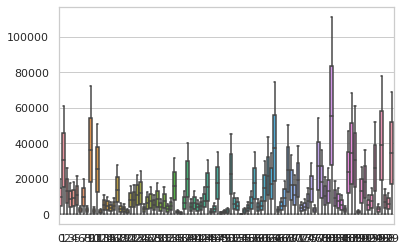

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.boxplot(data=Ta)

[['Choi' 22]
 ['Kim' 48]
 ['Joo' 32]]


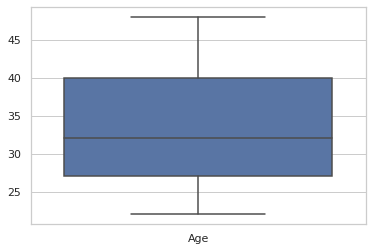

In [ ]:
data = [['Choi',22],['Kim',48],['Joo',32]]
df = pd.DataFrame(data, columns=['Name','Age'])
df
  # .values 또는 .to_numpy() 를 사용해 numpy 배열로 변환
print(df.to_numpy())

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.boxplot( data=df)

In [ ]:
df

,Name,Age
0,Choi,22
1,Kim,48
2,Joo,32


seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)

# 기타

In [ ]:
n1=1
imagePath1 = train_files[n1]['image']
maskPath1 = train_files[n1]['label']
print(imagePath1)
print(maskPath1)

/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_17_1/t1ce.nii.gz
/content/drive/MyDrive/Digital_image_processing/project/brats18_train/Brats18_2013_17_1/seg.nii.gz


In [ ]:
image1 = sitk.ReadImage(imagePath1)
label1 = sitk.ReadImage(maskPath1)

In [ ]:
result_1 = extractor.execute(imagePath1, maskPath1)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [ ]:
print('volume of #1:',result_1['original_shape_VoxelVolume'])

volume of #1: 60991.0


In [ ]:
print('')
print('Calculated features')
for key, value in six.iteritems(result_1):
    print('\t', key, ':', value)


Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.19.5
	 diagnostics_Versions_SimpleITK : 2.1.1
	 diagnostics_Versions_PyWavelet : 1.1.1
	 diagnostics_Versions_Python : 3.7.12
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 4, 'additionalInfo': True, 'binWidth': 10, 'sigma': 1}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : c306c33e49e55500a50ea772de21136723efcd00
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (1.0, 1.0, 1.0)
	 diagnostics_Image-original_Size : (240, 240, 155)
	 diagnostics_Image-original_Mean : 123.19686514336918
	 diagnostics_Image-or

In [ ]:
# Make an array of the values
feature_1 = np.array([])
feature_name = np.array([])
for key, value in six.iteritems(result_1):
    if key.startswith("original_firstorder") or key.startswith("original_glrlm") or key.startswith("original_ngtdm") or key.startswith("original_glcm") or key.startswith("original_glszm")or key.startswith("original_shape"):
        feature_name = np.append( feature_name,key.split('_')[-1])
        feature_1 = np.append ( feature_1, result_1[key])


In [ ]:
import pandas as pd

In [ ]:
T = pd.DataFrame({'feature_name':feature_name,path_list[n1].split('/')[-1]:feature_1})
T

,feature_name,Brats18_2013_17_1
0,Elongation,0.860792
1,Flatness,0.728738
2,LeastAxisLength,40.329482
3,MajorAxisLength,55.341506
4,Maximum2DDiameterColumn,57.628118
...,...,...
88,Busyness,0.328294
89,Coarseness,0.000187
90,Complexity,58105.887324
91,Contrast,0.371209


In [ ]:
a = {1: 'a'}
a['asd'] = 'b'
print(a)
b = {}
for i in range (10):
  b[i] = 1000

print(b)
print(1000 in b)
print('asd' in a)

{1: 'a', 'asd': 'b'}
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
False
True


In [ ]:
for i in range(3):
  globals()['strg%s' % i] = 'Hello'


In [ ]:
#for i in range(4):
#  f'abc{i}' = 4

